### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np

import os
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Embedding, LSTM


### Get working directory

In [3]:
os.getcwd()

'C:\\Users\\Admin'

### Changing directory

In [4]:
os.chdir('C:\\Users\\Admin\\Desktop')

In [5]:
## each entry of array will be a line

file = open('corona.txt', mode = 'r', encoding = 'utf8')

##Since Python 3.0, strings are stored as Unicode, i.e. each character in the string is represented by a code point. 
##So, each string is just a sequence of Unicode code points.
## encoding - 'utf8'(uniform transformation format, 8 bit values are used in encoding)
# mode = 'r' , open for reading in text mode

lines = []
for i in file:
    lines.append(i)


print("The First Line: ", lines[0])

print("The Last Line: ", lines[-1])

The First Line:  Narendra Modi Today on coronavirus LATEST Updates: Prime Minister Narendra Modi said that based on the suggestions by states, information about the extension of coronavirus lockdown will be given before 18 May. We will fight Corona and we will move forward, he added.

The Last Line:  Separately, the Union health ministry observed that some relatively large outbreaks have been noticed in particular locations and it is important to focus on containment efforts to ensure that the country does not reach the community transmission stage.


In [6]:
lines

['Narendra Modi Today on coronavirus LATEST Updates: Prime Minister Narendra Modi said that based on the suggestions by states, information about the extension of coronavirus lockdown will be given before 18 May. We will fight Corona and we will move forward, he added.\n',
 '\n',
 'We must not restrict our lives only around coronavirus , Modi said in his speech on Tuesday, and added that the fourth phase of the coronavirus lockdown in India will be completely different from the earlier three phases of the lockdown.\n',
 '\n',
 'Saying that India has been an example for progress in the last century, Modi said that the country needs to become self-reliant in the world after the coronavirus pandemic.\n',
 '\n',
 '"When the crisis started then not even a single PPE kit was manufactured in India, only a few N95 masks were available. Today two lakh PPE kits and 2 lakh N95 masks are manufactured in India daily," he added.\n',
 '\n',
 'Prime minister Narendra Modi started speaking on COVID-19 

### Cleaning data

In [7]:
data = " "

## all lines combined
for i in lines:
    data = " ".join(lines)
    
data


'Narendra Modi Today on coronavirus LATEST Updates: Prime Minister Narendra Modi said that based on the suggestions by states, information about the extension of coronavirus lockdown will be given before 18 May. We will fight Corona and we will move forward, he added.\n \n We must not restrict our lives only around coronavirus , Modi said in his speech on Tuesday, and added that the fourth phase of the coronavirus lockdown in India will be completely different from the earlier three phases of the lockdown.\n \n Saying that India has been an example for progress in the last century, Modi said that the country needs to become self-reliant in the world after the coronavirus pandemic.\n \n "When the crisis started then not even a single PPE kit was manufactured in India, only a few N95 masks were available. Today two lakh PPE kits and 2 lakh N95 masks are manufactured in India daily," he added.\n \n Prime minister Narendra Modi started speaking on COVID-19 situation, and said the world has

In [8]:
## replace bad words

data = data.replace('\n',' ').replace('\r', ' ').replace('\t', ' ').replace('ufeff', ' ')
data

'Narendra Modi Today on coronavirus LATEST Updates: Prime Minister Narendra Modi said that based on the suggestions by states, information about the extension of coronavirus lockdown will be given before 18 May. We will fight Corona and we will move forward, he added.    We must not restrict our lives only around coronavirus , Modi said in his speech on Tuesday, and added that the fourth phase of the coronavirus lockdown in India will be completely different from the earlier three phases of the lockdown.    Saying that India has been an example for progress in the last century, Modi said that the country needs to become self-reliant in the world after the coronavirus pandemic.    "When the crisis started then not even a single PPE kit was manufactured in India, only a few N95 masks were available. Today two lakh PPE kits and 2 lakh N95 masks are manufactured in India daily," he added.    Prime minister Narendra Modi started speaking on COVID-19 situation, and said the world has been ba

In [9]:
## to remove punctuations with spaces
import string

## creating an obj called - translator

translator = str.maketrans(string.punctuation," "*len(string.punctuation)) ## mapping punctuation with space

new_data = data.translate(translator)

new_data

## words acting as x and y
# Narendra - x
# Modi - y
#then Modi is x to predict next word i.e, y (Today)

'Narendra Modi Today on coronavirus LATEST Updates  Prime Minister Narendra Modi said that based on the suggestions by states  information about the extension of coronavirus lockdown will be given before 18 May  We will fight Corona and we will move forward  he added     We must not restrict our lives only around coronavirus   Modi said in his speech on Tuesday  and added that the fourth phase of the coronavirus lockdown in India will be completely different from the earlier three phases of the lockdown     Saying that India has been an example for progress in the last century  Modi said that the country needs to become self reliant in the world after the coronavirus pandemic      When the crisis started then not even a single PPE kit was manufactured in India  only a few N95 masks were available  Today two lakh PPE kits and 2 lakh N95 masks are manufactured in India daily   he added     Prime minister Narendra Modi started speaking on COVID 19 situation  and said the world has been ba

In [10]:
## Out of the given data, we need to create a dictionary of unique words\\

z = []

for i in new_data.split():
    if i not in z:
        z.append(i)
        
z

## combining all the words in a line

new_data = ' '.join(z)

new_data

'Narendra Modi Today on coronavirus LATEST Updates Prime Minister said that based the suggestions by states information about extension of lockdown will be given before 18 May We fight Corona and we move forward he added must not restrict our lives only around in his speech Tuesday fourth phase India completely different from earlier three phases Saying has been an example for progress last century country needs to become self reliant world after pandemic When crisis started then even a single PPE kit was manufactured few N95 masks were available two lakh kits 2 are daily minister speaking COVID 19 situation battling over four months now Over 3 people have succumbed infection says condoling deaths approved ex gratia Rs each next kin 16 migrants who run goods train near Aurangabad Maharashtra is set address nation at 8 pm This s fifth PM comes time when 70 000 cases West Bengal chief Mamata Banerjee as relief unlikely soon there need month plan deal with also quoted saying facing proble

In [11]:
## checking the length of the data

len(new_data)

## 3824

3824

### Tokenization

In [13]:
## array of words passed in models to train -- tokenization

## we pass no (give no to each word called embedding)
## for each word assigning unique number
## after tokenizing assigning no to eaxh unique word

tokenizer = Tokenizer()

tokenizer.fit_on_texts([new_data])



## converting 2d output to 1d

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data


#[we, visit, agra, we, liked, agra]
#[1 33 44 1 23 44]


#WARM STATE=true
#TRANSFER LEARNING


[26,
 27,
 28,
 1,
 29,
 30,
 31,
 32,
 2,
 26,
 27,
 33,
 34,
 35,
 1,
 3,
 36,
 37,
 38,
 39,
 40,
 3,
 41,
 42,
 29,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 4,
 44,
 50,
 51,
 52,
 4,
 44,
 53,
 54,
 55,
 56,
 4,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 29,
 27,
 33,
 5,
 64,
 65,
 1,
 66,
 52,
 56,
 34,
 3,
 67,
 68,
 42,
 3,
 29,
 43,
 5,
 69,
 44,
 45,
 70,
 71,
 72,
 3,
 73,
 6,
 74,
 42,
 3,
 43,
 7,
 34,
 69,
 75,
 76,
 8,
 77,
 78,
 79,
 5,
 3,
 80,
 81,
 27,
 33,
 34,
 3,
 82,
 83,
 84,
 85,
 86,
 87,
 5,
 3,
 88,
 9,
 3,
 29,
 89,
 10,
 3,
 90,
 91,
 92,
 58,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 5,
 69,
 62,
 94,
 100,
 101,
 102,
 103,
 104,
 28,
 11,
 105,
 96,
 106,
 52,
 107,
 105,
 101,
 102,
 108,
 99,
 5,
 69,
 109,
 55,
 56,
 32,
 2,
 26,
 27,
 91,
 110,
 1,
 111,
 112,
 113,
 52,
 33,
 3,
 88,
 75,
 76,
 114,
 3,
 89,
 78,
 12,
 115,
 116,
 117,
 12,
 118,
 105,
 119,
 120,
 121,
 84,
 3,
 122,
 55,
 123,
 124,
 3,
 125,
 32,
 2,
 26,
 27,
 1,
 66,
 126,
 127,
 128,
 42,
 12

In [14]:
## checking unique words

len(sequence_data)

1473

In [15]:
## word wise no assigned 
tokenizer.word_index.items()

dict_items([('on', 1), ('minister', 2), ('the', 3), ('we', 4), ('in', 5), ('three', 6), ('saying', 7), ('an', 8), ('after', 9), ('when', 10), ('two', 11), ('over', 12), ('pm', 13), ('this', 14), ('as', 15), ('with', 16), ('according', 17), ('it', 18), ('health', 19), ('ministry', 20), ('capital', 21), ('new', 22), ('within', 23), ('grant', 24), ('finance', 25), ('narendra', 26), ('modi', 27), ('today', 28), ('coronavirus', 29), ('latest', 30), ('updates', 31), ('prime', 32), ('said', 33), ('that', 34), ('based', 35), ('suggestions', 36), ('by', 37), ('states', 38), ('information', 39), ('about', 40), ('extension', 41), ('of', 42), ('lockdown', 43), ('will', 44), ('be', 45), ('given', 46), ('before', 47), ('18', 48), ('may', 49), ('fight', 50), ('corona', 51), ('and', 52), ('move', 53), ('forward', 54), ('he', 55), ('added', 56), ('must', 57), ('not', 58), ('restrict', 59), ('our', 60), ('lives', 61), ('only', 62), ('around', 63), ('his', 64), ('speech', 65), ('tuesday', 66), ('fourth',

In [16]:
vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)


## because index starts from 0 -- 551

552


In [17]:
tokenizer.word_index

{'on': 1,
 'minister': 2,
 'the': 3,
 'we': 4,
 'in': 5,
 'three': 6,
 'saying': 7,
 'an': 8,
 'after': 9,
 'when': 10,
 'two': 11,
 'over': 12,
 'pm': 13,
 'this': 14,
 'as': 15,
 'with': 16,
 'according': 17,
 'it': 18,
 'health': 19,
 'ministry': 20,
 'capital': 21,
 'new': 22,
 'within': 23,
 'grant': 24,
 'finance': 25,
 'narendra': 26,
 'modi': 27,
 'today': 28,
 'coronavirus': 29,
 'latest': 30,
 'updates': 31,
 'prime': 32,
 'said': 33,
 'that': 34,
 'based': 35,
 'suggestions': 36,
 'by': 37,
 'states': 38,
 'information': 39,
 'about': 40,
 'extension': 41,
 'of': 42,
 'lockdown': 43,
 'will': 44,
 'be': 45,
 'given': 46,
 'before': 47,
 '18': 48,
 'may': 49,
 'fight': 50,
 'corona': 51,
 'and': 52,
 'move': 53,
 'forward': 54,
 'he': 55,
 'added': 56,
 'must': 57,
 'not': 58,
 'restrict': 59,
 'our': 60,
 'lives': 61,
 'only': 62,
 'around': 63,
 'his': 64,
 'speech': 65,
 'tuesday': 66,
 'fourth': 67,
 'phase': 68,
 'india': 69,
 'completely': 70,
 'different': 71,
 'from':

In [18]:
## pairing words in 2d array
## preparing train and test data
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))

sequences = np.array(sequences)

sequences[:10]


#[17, 53, 293, 2, 18, 729, 135, 730, 294, 8]


The Length of sequences are:  1472


array([[26, 27],
       [27, 28],
       [28,  1],
       [ 1, 29],
       [29, 30],
       [30, 31],
       [31, 32],
       [32,  2],
       [ 2, 26],
       [26, 27]])

In [19]:
## 0 index of 2 d array as x and 1st index as y
x = []
y = []

for i in sequences:
    x.append(i[0])
    y.append(i[1])
    
x = np.array(x)
y = np.array(y)





In [20]:
y.shape

(1472,)

In [21]:
x.shape

(1472,)

In [22]:
print("The Data is: ", x[:5])

print("The responses are: ", y[:5])


The Data is:  [26 27 28  1 29]
The responses are:  [27 28  1 29 30]


In [23]:
## embedding layer automaticatley covert x into vectors of 0,1,0,1(converting input space into vector space) and generate vector of
## output 0,1 so need to convert y into 0,1 vectors
## embedding layers k through pass krega those vectors

## need to convert output y on our own so that easily compared with output vectors

## in keras we have to_categorically like one hot encoding (creating one hot encoding space)
#In rows we have vocab and columns we have words, matching rows = columns is 1 and rest 0

y = to_categorical(y, num_classes=vocab_size)

y[:5]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y.shape

(1472, 552)

### Keras model


In [ ]:
# one hot encoding or embedding =-------for vector representation
## each no into a vector - embedding will do

## one hot encoding problem - it creates a sparse matrix
## eg 8 no is represnted as 10 dim vectors will contain 10 rows out of which 8th index has value 1 rest is 0
##(no needs to be represntd as vector)


## instead of 0 1 we have more relevant i.e. emebedding
#NLP - WORD EMBEDDING FOUNDATION
##embedding automotictely do it for u
## packages for embedding on ur own - word2vec and Glove


In [25]:
## embedding is a special layer - It is going to play role of input layer in a different way
## part of hidden layer - direct relation with input layer 

## processiong in embedding layer thats 'why its's a hidden layer
## work for embedding layer to generate sequence for the lstm layer

## you need to set return_sequences = true (to preseve that sequence coming from embedding layer)in lstm because they understand sequence, 
## when one layer of lstm going to another layer of lstm then we need to preserve the sequence (return_sequences)

## vocab_size = output layer - for each word we will predict a prob(given word what is the next word), max prob will be the output

## first layer embedding and lst layer is mandatory

In [26]:
model = Sequential()

model.add(Embedding(vocab_size,10,input_length = 1))

#vocab_size = input_dim
# 10 - output_dim
#input length of user should be 1 to predict next word

model.add(LSTM(1000,  return_sequences = True))
model.add(LSTM(1000))

model.add(Dense(1000, activation = 'relu'))

model.add(Dense(vocab_size, activation = 'softmax'))
          
          

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 10)             5520      
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 552)               552552    
Total params: 13,607,072
Trainable params: 13,607,072
Non-trainable params: 0
_________________________________________________________________


### For Plotting model - Import Libraries
#### You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')

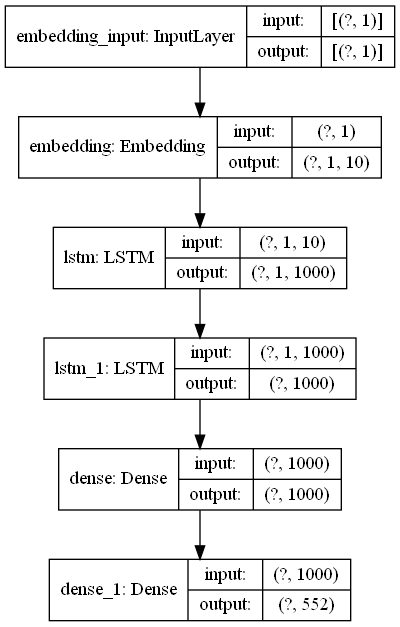

In [28]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file = 'model.png', show_layer_names = True,show_shapes=True,    expand_nested=True
,rankdir='TB')

In [ ]:
# whenever we train model, model call these funct from back -- call backs

## writing the functions within in a array and late calling them after every epoch
## when first epoch get completed for next epoch these all funct get called

## checkpoint model - if loss gets decrese that state wil be included inn h5 file
## getting updated after every epoch - h5 file

## keras - library
## tensorflow - framework

## library - wrapper that gives some funct to call, call the underline funct from framework
## framework - that actually interacts with machine(coding underline mathematial matrix)

## all those embedded related vectors were tensors


###  Callbacks : Checkpoint

In [38]:
## Output files for future predictions

## To save the current state of model in a new file(saving the state of model) we use checkpoint
## this model you can share this with ur team 

## saving the state of model , we can't train this again and again so saving it

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('nextword1.h5', monitor = 'loss', verbose = True, save_best_only = True, mode = 'auto')



### Calbacks : ReduceLROnPlateau

In [39]:
##reduce learning rate on plateau - loss funct is decreasing, after some time it becomes straight called plateau
## loss is not decreasing anymore - should model terminate? here we ask neural network to be intelligent we ask to reduce learning rate,
##i.e. start taking smaller jumps to reach global minima
## it takes certain parameters - monitor loss funct(loss funct normally decrease and see if it is coming to plateau)
##lr - 0.03 initially setting patience as 0.22 then new lr becomes 0.03*2

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce = ReduceLROnPlateau(monitor = 'loss', factor = 0.2, patience = 3, min_lr = 0.0001, verbose = True)




### Callbacks : TensorBoard


In [40]:
#Tensorboard - to print your graphs of accuracy and other variables
##tensorboard visualization --- in tensoroard

from tensorflow.keras.callbacks import TensorBoard

logdir='logsnextword'
tensorboard_vis = TensorBoard(log_dir=logdir)

### Also saving the tokenizer

In [ ]:
# saving the tokenizer for predict function.
## saving tokenization so that it assign same no for the future purpose of the same word
## so that numbering of words is not lost embedding layer with give different vector outputs

import pickle

## dumming the tokenizer into the model
pickle.dump(tokenizer, open('tokenizer.pkl','wb'))

In [41]:
### callbacks list

callbacks_list = [checkpoint, reduce, tensorboard_vis]

#### For generic python process will save in - .pkl file 
#### For model processing will be saved in - pml or .h5 file

In [42]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

In [43]:
model.fit(x, y, epochs=150, batch_size=64,callbacks=callbacks_list)

Epoch 1/150
 1/23 [>.............................] - ETA: 0s - loss: 1.7421WARNING:tensorflow:From C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
23/23 [==============================] - ETA: 0s - loss: 2.0790
Epoch 00001: loss improved from inf to 2.07903, saving model to nextword1.h5
23/23 [==============================] - 4s 185ms/step - loss: 2.0790
Epoch 2/150
23/23 [==============================] - ETA: 0s - loss: 1.8020
Epoch 00002: loss improved from 2.07903 to 1.80204, saving model to nextword1.h5
23/23 [==============================] - 4s 179ms/step - loss: 1.8020
Epoch 3/150
23/23 [==============================] - ETA: 0s - loss: 1.7314
Epoch 00003: loss improved from 1.80204 to 1.73139, saving model to nextword1.h5
23/23 [==============================] - 4s 176m

### TensorBoard plus Graph

In [47]:
#%load_ext tensorboard.notebook

%reload_ext tensorboard
#  %reload_ext tensorboard
#--debugger_port <port_number>

%tensorboard --logdir=./logsnextword #logs/fit

#ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 12120.

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 12120.

In [48]:
%tensorboard dev upload --logdir ./logsnextword
#\
 #   'logs/fit'

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2020-11-07 16:29:03.557816: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2020-11-07 16:29:03.560310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logsnextword

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.



### Prediction

In [44]:
prediction = model.predict_classes(x)
prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([ 27,  33,   3, ..., 111, 550, 551], dtype=int64)

### Evaluate

In [46]:
model.evaluate(prediction,y)



46/46 [==============================] - 1s 18ms/step - loss: 69.1827


69.18267822265625

In [ ]:
## To predict the next word-  we have to decide by taking  the input as one word to predict one word i.e output
## or 2 words to predict one and so onnn.. so for that we need n-grams - unigram bigram and trigram


In [ ]:
## model takes index and gives index your responsibility to know the word at that index

## tokenization act as a dictionary which helps in prediction purposes

In [ ]:
## setting path for plotting model
#import os

#os.environ["Path"]= "C:\\Program Files\\Graphviz\\bin"



In [ ]:
#import os
#os.getenv("Path")


In [ ]:
## n grams - unigram - for every word what is the next word
##bigram - using two words what is the next word



#[17,53,293,2,.....]
#[  [17 53]   [53 293]  [293 2]]

## in trigram 17,53,293 become one record 
##feature space is same but input space shrinks so size of training data decreases